# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [4]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [5]:
# rajoutons l'ordonnée à l'origine theta 0



intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

# Initialise the Scaler
scaler = StandardScaler()
# To scale data
scaler.fit(data[:,0:2])

ScaledData = scaler.transform(data[:,0:2])

print(ScaledData.shape)

X=np.array(np.column_stack((intercept,ScaledData[:,0:2])))
y = data[:, 2]


(100, 2)


In [6]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [7]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return np.array(1/(1+np.exp(-z)))

 

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [8]:
def computeCost(X, y, theta):

    return (-1/y.shape[0])*np.sum(y*np.log(Sigmoid(X.dot(theta)))+(1-y)*np.log(1-Sigmoid(X.dot(theta))))
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [9]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    for i in range(iterations):
        yb = Sigmoid(np.dot(X,theta))
        Dj = (np.dot(X.T, yb - y))/len(y)
        theta=theta-(alpha)*Dj

    return theta

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [10]:
n=X.shape[1]
theta = np.zeros((n, ))


Calculer le cout initial

In [11]:
initialCost=computeCost(X, y, theta)
print('initial cost', initialCost)


initial cost 0.6931471805599453


Appel des la fonction de calcul du gradient

In [12]:
# paramètres
iterations = 3000;
alpha = 0.015;
# Appel
theta = gradientDescent(X, y, theta, alpha, iterations);
print('theta', theta)

theta [0.964411   2.39999584 2.20153127]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [13]:
def drawLine():
    # tracer la droite de régression
    x1 = np.array([np.min(X[:,1]), np.max(X[:,1])])
    x2 = -(theta[0] + theta[1]*x1)/theta[2]
    plt.plot(x1, x2, 'r', label='Decision Boundary')
    

# Affichage 
Graphe representant les acceptations selon les caracteristiques

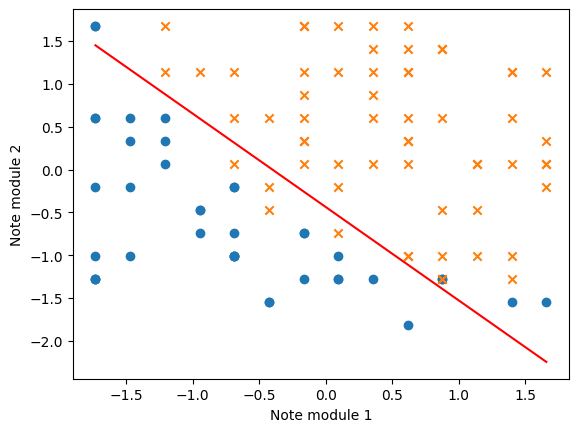

In [14]:


plt.scatter(X[np.where(y==np.unique(y)[0]),1],X[np.where(y==np.unique(y)[0]),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==np.unique(y)[1]),1],X[np.where(y==np.unique(y)[1]),2], label="non accepte",marker ='x')
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

drawLine()

Prédire des valeurs de y

In [15]:
# Predire pour des notes note1= 9 et note2=17
print('Pour une note de 9 et 17, la probabilité d\'acceptation est de ', Sigmoid(np.dot(np.column_stack((np.ones((1,)),scaler.transform([[9,17]]))),theta)))
# Predire pour des notes note1= 9 et note2=17
print('Pour une note de 9 et 11, la probabilité d\'acceptation est de ', Sigmoid(np.dot(np.column_stack((np.ones((1,)),scaler.transform([[9,11]]))),theta)))


Pour une note de 9 et 17, la probabilité d'acceptation est de  [0.7674654]
Pour une note de 9 et 11, la probabilité d'acceptation est de  [0.08656715]


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

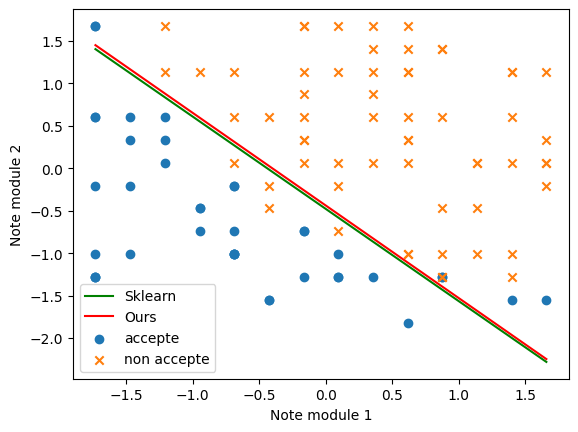

In [16]:
from sklearn.linear_model import LogisticRegression


logisticRegr = LogisticRegression()

logisticRegr.fit(X, y)

x1 = np.array([np.min(X[:,1]), np.max(X[:,1])])
x2 = -(logisticRegr.intercept_ + logisticRegr.coef_[0][1]*x1)/logisticRegr.coef_[0][2]
plt.plot(x1, x2, 'g', label='Sklearn')

x1 = np.array([np.min(X[:,1]), np.max(X[:,1])])
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1, x2, 'r', label='Ours')


plt.scatter(X[np.where(y==np.unique(y)[0]),1],X[np.where(y==np.unique(y)[0]),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==np.unique(y)[1]),1],X[np.where(y==np.unique(y)[1]),2], label="non accepte",marker ='x')
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

plt.legend()

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

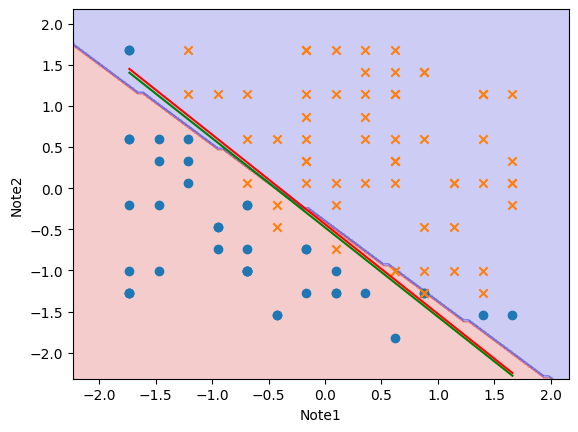

In [17]:
fig, ax = plt.subplots()

# create data for the surface
x = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
y1 = np.linspace(X[:,2].min()-0.5, X[:,2].max()+0.5, 100)

z = np.zeros((x.shape[0], y1.shape[0]))
for i in range(x.shape[0]):
    for j in range(y1.shape[0]):
        if(Sigmoid(np.dot([1,x[i],y1[j]],theta)) > 0.5):
            z[i,j] = 1
        else:
            z[i,j] = 0

x, y1 = np.meshgrid(x, y1)

# set the axis labels

cmap = plt.cm.get_cmap('jet')
colors = ['red', 'blue']
cmap = ListedColormap([(50,0,0,0.2),(0,0,50,0.2)])
cp = ax.contourf(x, y1, z,cmap=cmap)


# set the axis labels
ax.set_xlabel('Note1')
ax.set_ylabel('Note2')
ax.scatter(X[np.where(y==np.unique(y)[0]),1],X[np.where(y==np.unique(y)[0]),2], label="accepte",marker ='o')
ax.scatter(X[np.where(y==np.unique(y)[1]),1],X[np.where(y==np.unique(y)[1]),2], label="non accepte",marker ='x')
# add a title

x1 = np.array([np.min(X[:,1]), np.max(X[:,1])])
x2 = -(logisticRegr.intercept_ + logisticRegr.coef_[0][1]*x1)/logisticRegr.coef_[0][2]
ax.plot(x1, x2, 'g', label='Sklearn')

x1 = np.array([np.min(X[:,1]), np.max(X[:,1])])
x2 = -(theta[0] + theta[1]*x1)/theta[2]
ax.plot(x1, x2, 'r', label='Ours')

# show the plot
plt.show()

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Avril 2023


In [16]:
# bonne chance

#BELAISSAOUI Mohamed elmekki
#ABDELHADI Nabih samy 